# BUSA8000 Techniques in Business Analytics - Assignment 2

In [30]:
NAME = 'AMEY PRADEEP SAWANT'
STUDENT_ID = '48401102' 
print(NAME)
print(STUDENT_ID) 

AMEY PRADEEP SAWANT
48401102


## Section 1: Exploratory Data Analysis (EDA)

In this section, we clean the dataset by handling missing values and detecting outliers. Missing values are filled with the median, and outliers beyond the 99th percentile are handled to ensure the data is clean and reliable for analysis.

In [31]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_1samp, ttest_ind, f_oneway

In [32]:
# Loading the dataset
df = pd.read_excel('koalas_dataset.xlsx') 

In [33]:
# Display the first few rows of the dataset to understand its structure
df.head()

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,1,VIC,m,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0
1,2,1,VIC,f,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0
2,3,1,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0


In [34]:
df.describe()

,koala_id,region,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,102.000000,103.000000,104.000000,104.000000,103.000000
mean,52.500000,3.625000,3.833333,17.009615,75.088462,18.554808,22.650000,18.461765,12.917476,5.886538,62.000000,57.582524
std,30.166206,2.349086,1.909244,1.959518,4.310549,9.761017,87.562416,4.416935,11.160491,39.082636,2.045597,2.775150
min,1.000000,1.000000,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,26.750000,1.000000,2.250000,15.875000,72.000000,15.700000,9.875000,14.550000,9.950000,1.400000,60.500000,56.000000
50%,52.500000,3.000000,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,78.250000,6.000000,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.250000
max,104.000000,7.000000,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   koala_id             104 non-null    int64  
 1   region               104 non-null    int64  
 2   habitat              104 non-null    object 
 3   gender               104 non-null    object 
 4   age_in_years         102 non-null    float64
 5   Paw Size             104 non-null    float64
 6   total_length         104 non-null    float64
 7   head_length          104 non-null    float64
 8   ear_size             104 non-null    float64
 9   foot_length          102 non-null    float64
 10  skull_width          103 non-null    float64
 11  eye_diameter         104 non-null    float64
 12  chest_circumference  104 non-null    float64
 13  belly_circumference  103 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


## Section 1: Exploratory Data Analysis (EDA)
In this section, we clean the dataset by handling missing values and detecting outliers. Missing values are filled with the median, and outliers beyond the 99th percentile are handled to ensure the data is clean and reliable for analysis.

In [36]:
# Checking for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           2
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            2
skull_width            1
eye_diameter           0
chest_circumference    0
belly_circumference    1
dtype: int64


In [37]:
# Filling missing values with the median
df['age_in_years'].fillna(df['age_in_years'].median(), inplace=True)
df['skull_width'].fillna(df['skull_width'].median(), inplace=True)
df['foot_length'].fillna(df['foot_length'].median(), inplace=True)
df['belly_circumference'].fillna(df['belly_circumference'].median(), inplace=True)

In [38]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           0
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            0
skull_width            0
eye_diameter           0
chest_circumference    0
belly_circumference    0
dtype: int64


In [39]:
# Print the unique values of each column individually

for column in df.columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("\n")

Unique values for koala_id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


Unique values for region:
[1 2 3 4 5 6 7]


Unique values for habitat:
['VIC' 'VICtoria' 'Vic' 'QLD' 'Queensland' 'Queenstown' 'qld' 'q']


Unique values for gender:
['m' 'f' 'female' 'male']


Unique values for age_in_years:
[8. 6. 2. 1. 9. 5. 3. 4. 7.]


Unique values for Paw Size:
[16.  16.5 19.  18.  15.5 17.  17.5 14.  14.5 15.  19.5 13.5 12.  20.
 23.  21.  18.5 20.5 21.5]


Unique values for total_length:
[77.  79.5 83.5 80.  73.5 78.5 77.5 79.  74.  78.  84.5 72.  73.  75.
 76.  81.  82.  70.5 68.5 63.  72.5 71.  65.  69.  64.  81.5 

In [40]:
# Cleaning the 'habitat' column by standardizing the values
df['habitat'] = df['habitat'].replace({
    'VICtoria': 'Victoria',
    'Vic': 'Victoria',
    'VIC': 'Victoria',
    'qld': 'Queensland',
    'q': 'Queensland',
    'QLD': 'Queensland',
    'Queenstown': 'Queensland'
})

# Checking the unique values in the 'habitat' column after cleaning
print(df['habitat'].unique())

['Victoria' 'Queensland']


In [41]:
# Standardizing the 'gender' column by replacing abbreviations with full terms
df['gender'] = df['gender'].replace({
    'm': 'Male',
    'f': 'Female',
    'male': 'Male',
    'female': 'Female'
})

# Checking the unique values in the 'gender' column after cleaning
print(df['gender'].unique())

['Male' 'Female']


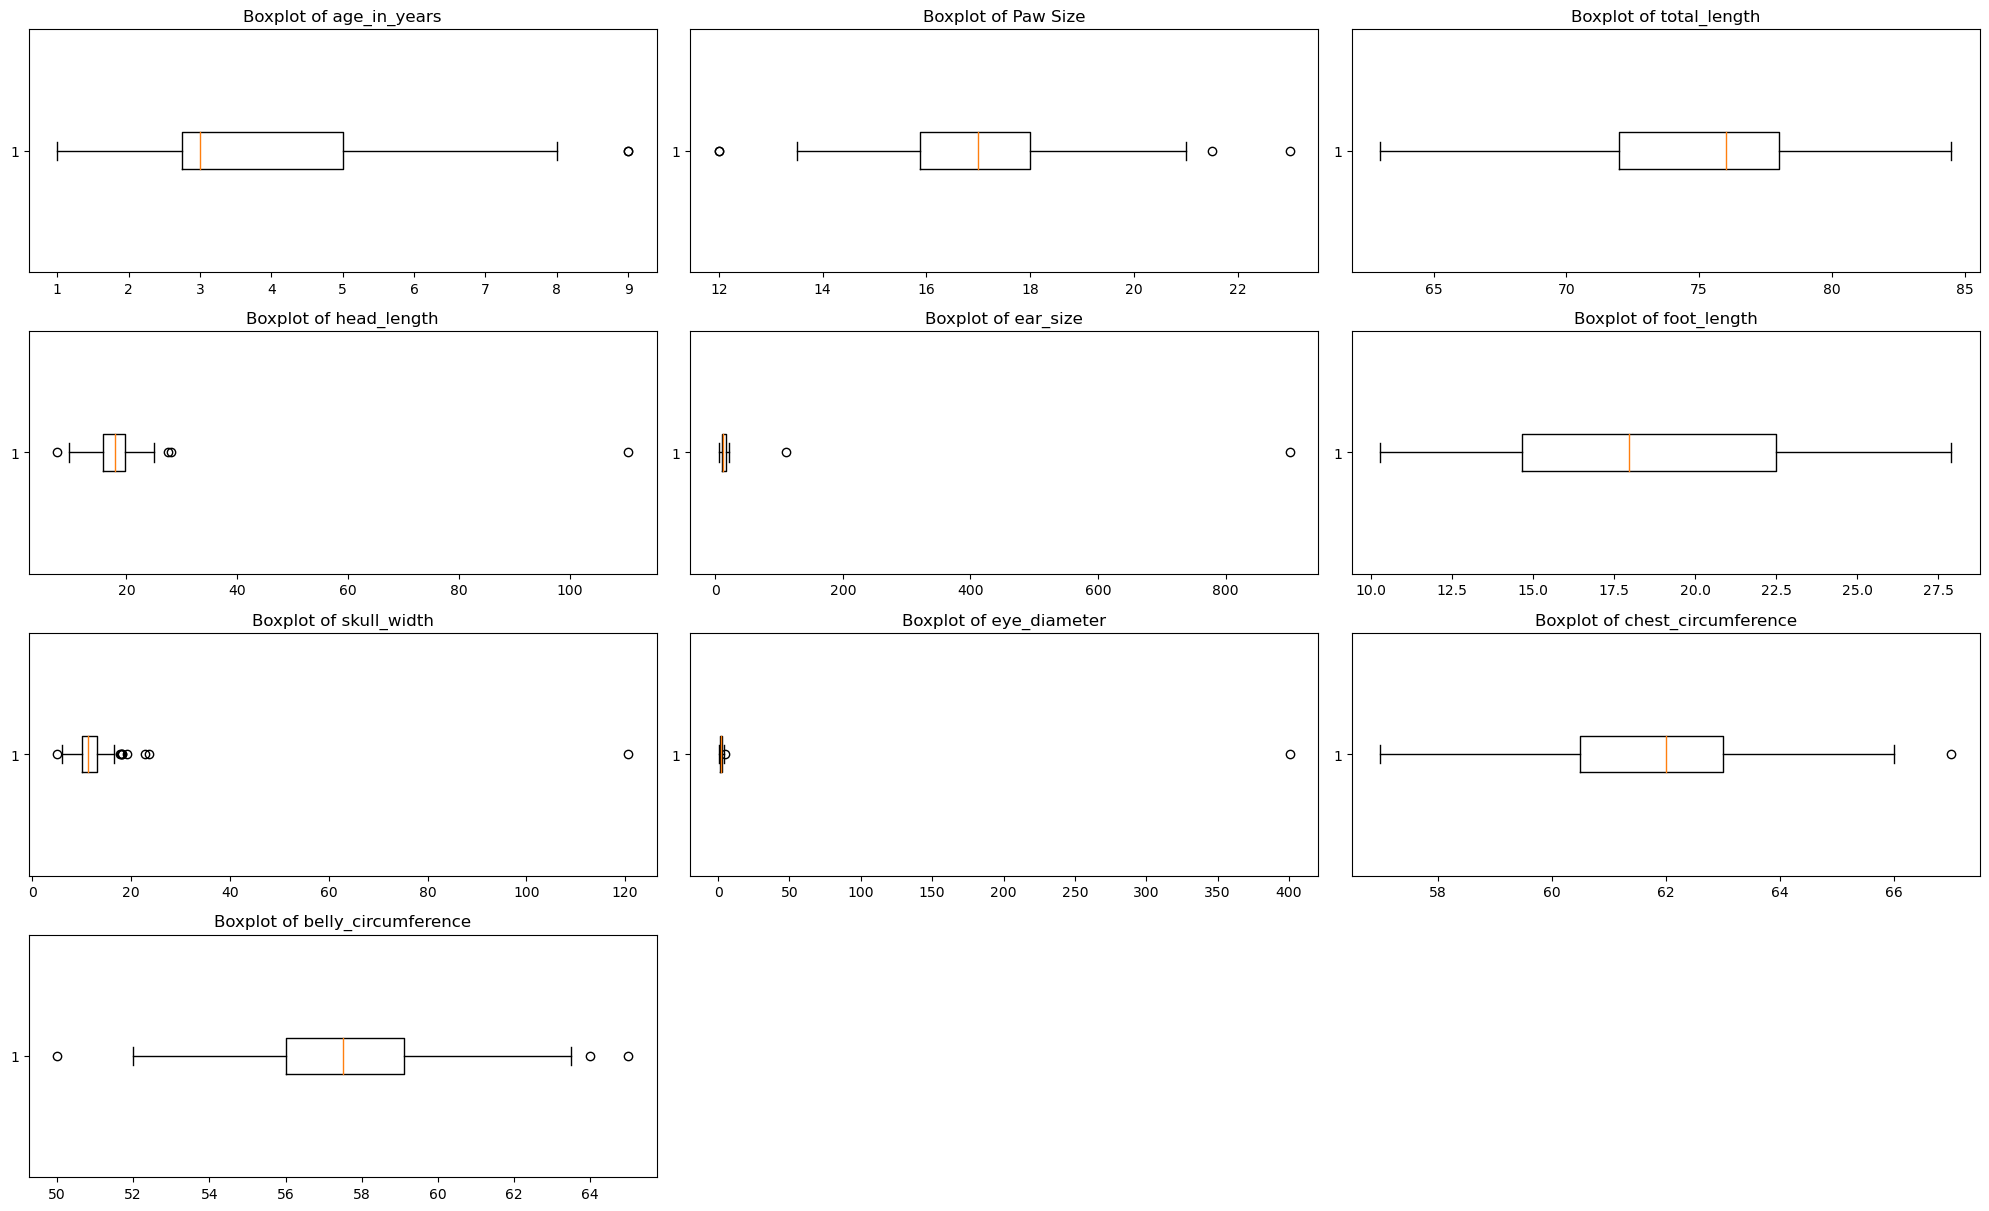

In [42]:
# Select numerical columns for checking outliers
# Select numerical columns for checking outliers
numerical_columns = ['age_in_years', 'Paw Size', 'total_length', 'head_length', 
                     'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 
                     'chest_circumference', 'belly_circumference']

# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [43]:
columns = ['age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']
for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
    number_of_outliers = len(outliers)
    print(f'The number of outliers in {column} is {number_of_outliers}.')
    if number_of_outliers > 0:
        df.loc[(df[column] > upper_bound) | (df[column] < lower_bound), column] = df[column].median()
        n_outliers = len(df[(df[column] > upper_bound) | (df[column] < lower_bound)])
        print(f'The number of outliers in {column} is {n_outliers}.')
    print('\n')

The number of outliers in age_in_years is 2.
The number of outliers in age_in_years is 0.


The number of outliers in Paw Size is 4.
The number of outliers in Paw Size is 0.


The number of outliers in total_length is 0.


The number of outliers in head_length is 4.
The number of outliers in head_length is 0.


The number of outliers in ear_size is 2.
The number of outliers in ear_size is 0.


The number of outliers in foot_length is 0.


The number of outliers in skull_width is 9.
The number of outliers in skull_width is 0.


The number of outliers in eye_diameter is 2.
The number of outliers in eye_diameter is 0.


The number of outliers in chest_circumference is 1.
The number of outliers in chest_circumference is 0.


The number of outliers in belly_circumference is 3.
The number of outliers in belly_circumference is 0.




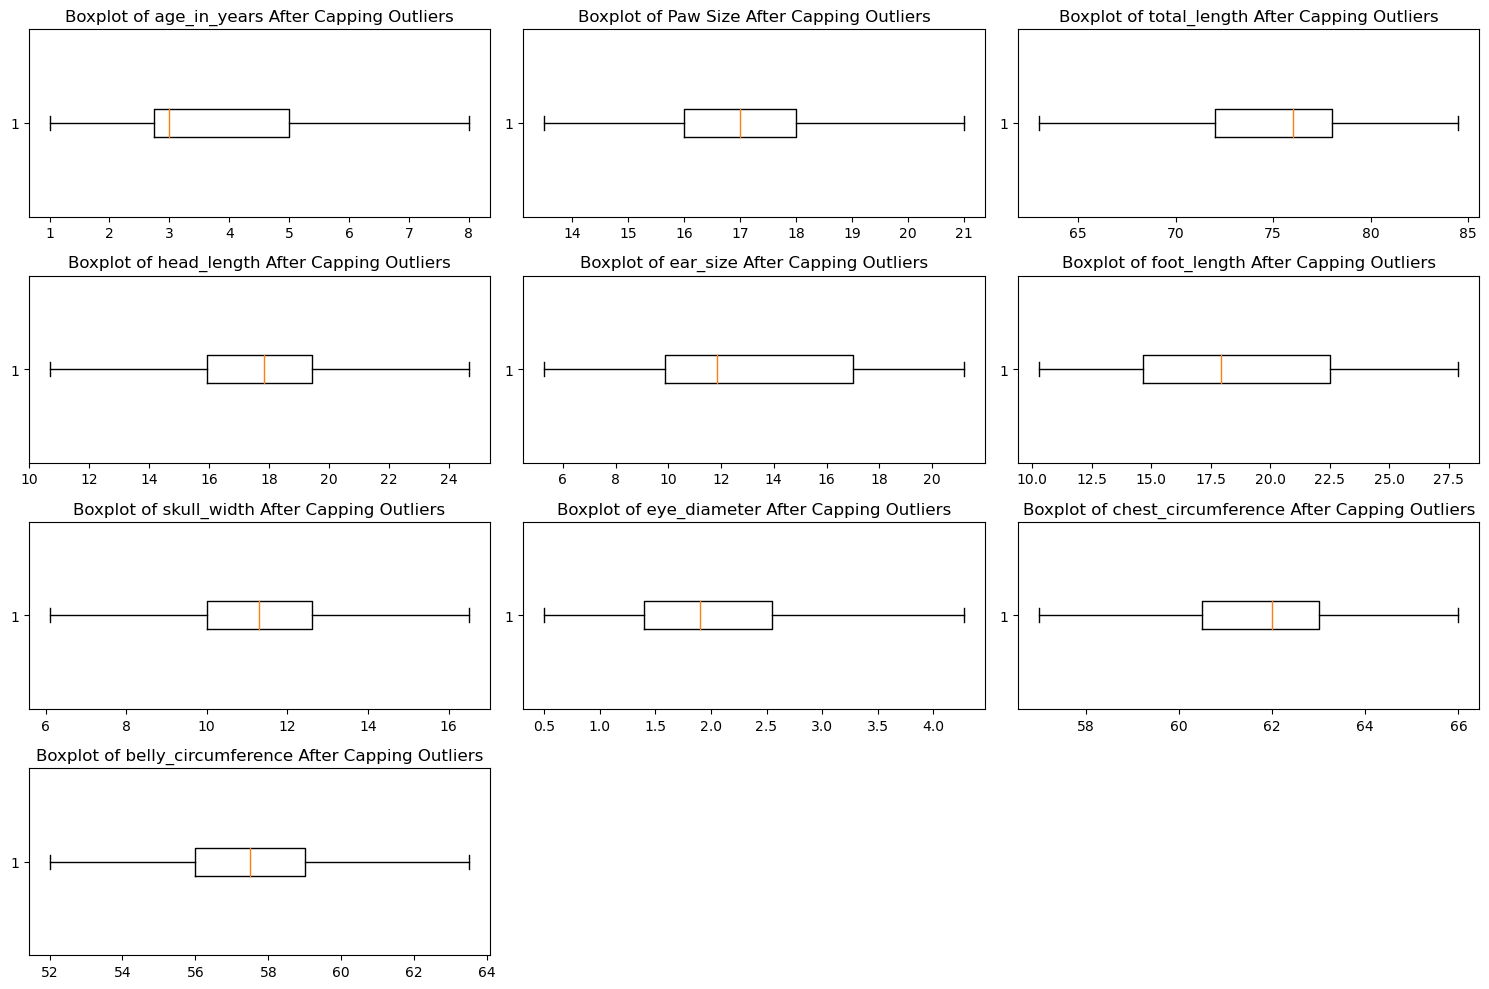

In [44]:
# Capping outliers using the 1.5*IQR rule

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Capping the values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Visualizing the dataset after capping the outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column} After Capping Outliers')

plt.tight_layout()
plt.show() 

In [45]:
# Checking for skewness in numerical columns

from scipy.stats import skew
columns = ['age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']
for column in columns:
    skewness = df[column].skew()
    print(f'The value of skewness for {column} is {skewness}.\n') 

The value of skewness for age_in_years is 0.40225832745280016.

The value of skewness for Paw Size is 0.1634503130839907.

The value of skewness for total_length is -0.285265771534212.

The value of skewness for head_length is -0.29312508178047453.

The value of skewness for ear_size is 0.14316798966263955.

The value of skewness for foot_length is 0.09752005197842935.

The value of skewness for skull_width is -0.05042800161549151.

The value of skewness for eye_diameter is 0.5419074021437662.

The value of skewness for chest_circumference is -0.1449181768674593.

The value of skewness for belly_circumference is 0.032814182415398775.



In [46]:
# I'll use the .copy() method to create a copy of the dataset and save it to another DataFrame.
koalas_dataset_cleaned = df.copy()

In [62]:
print(koalas_dataset_cleaned.columns)

Index(['koala_id', 'region', 'habitat', 'gender', 'age_in_years', 'Paw Size',
       'total_length', 'head_length', 'ear_size', 'foot_length', 'skull_width',
       'eye_diameter', 'chest_circumference', 'belly_circumference',
       'habitat_encoded'],
      dtype='object')


## Section 2: Data Visualisation

We create two visualisations to reveal important insights about koalas' physical characteristics.

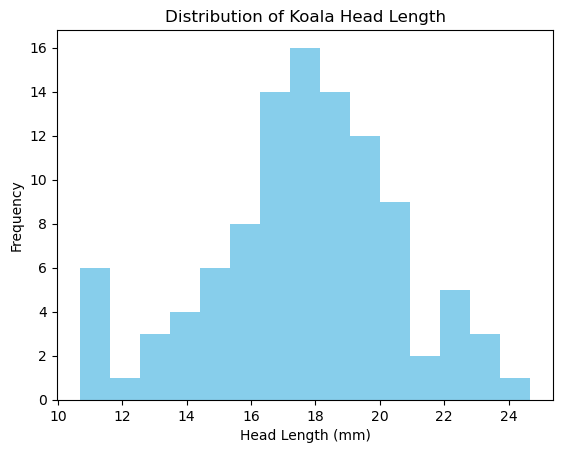

In [47]:
# Visualisation 1: Histogram of Head Length
plt.hist(koalas_dataset_cleaned['head_length'], bins=15, color='skyblue')
plt.title('Distribution of Koala Head Length')
plt.xlabel('Head Length (mm)')
plt.ylabel('Frequency')
plt.show()

Visualization 1: Histogram of Koala Head Length
Choice Explanation: A histogram is used to visualize the distribution of numerical data by dividing the data into bins. In this case, we chose to plot a histogram of koala head length to understand how head lengths are distributed across the dataset. This is an effective way to see the range, frequency, and skewness of the data.

Insights:

The majority of koalas have a head length between 16 mm and 20 mm.
There are a few koalas with smaller head lengths, around 12 mm, and a few with larger head lengths, reaching up to 24 mm.
The distribution shows a roughly symmetric pattern, with most koalas clustered around the middle range of head lengths (17-19 mm).
This insight could help conservationists or researchers understand the typical size of koala head lengths and identify outliers or unusual values that might suggest further investigation is needed.

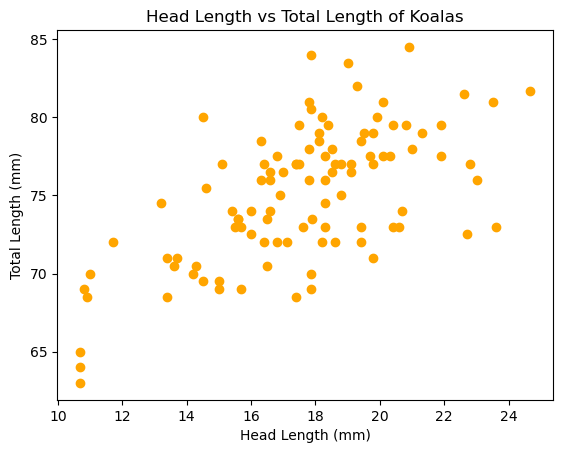

In [48]:
# Visualisation 2: Scatter plot of Head Length vs Total Length
plt.scatter(koalas_dataset_cleaned['head_length'], koalas_dataset_cleaned['total_length'], color='orange')
plt.title('Head Length vs Total Length of Koalas')
plt.xlabel('Head Length (mm)')
plt.ylabel('Total Length (mm)')
plt.show()

Visualization 2: Scatter Plot of Head Length vs Total Length
Choice Explanation: A scatter plot is an ideal way to visualize the relationship between two continuous variables. In this case, we chose to create a scatter plot of head length vs total length to explore whether there is any correlation between these two variables.

Insights:

There seems to be a positive relationship between head length and total length. As the koalas' head length increases, their total length also tends to increase.
The scatter plot shows a general upward trend, suggesting that koalas with larger head sizes tend to be longer overall. However, there is some variation, and not all data points follow this trend perfectly.
This plot provides valuable insights for predicting koalas' overall size based on their head length. It suggests that head length can be a useful predictor of total length, which could be beneficial for wildlife management and conservation efforts.



## Section 3: Analysis (50 Marks)

### Question 3.1: Is the mean head length significantly different from 92.0 mm?
We conduct a one-sample t-test to determine whether the mean head length of koalas is significantly different from 92.0 mm.

In [49]:
from scipy import stats
population_mean = 9.2
t_statistic, p_value = stats.ttest_1samp(koalas_dataset_cleaned['head_length'], population_mean)
print("t-statistic:", t_statistic)
print("p-value:", p_value)
alpha = 0.05

print("\nExplanation of Results : The t-statistic measures how far the sample mean is from 92.0 mm in terms of standard error. The p-value tells us the probability of observing the sample mean if the null hypothesis (that the mean is 92.0 mm) is true. If the p-value is less than 0.05, we reject the null hypothesis, meaning the mean head length is significantly different from 92.0 mm.")

if p_value < alpha:
    print("\nReject the null hypothesis. The mean head length is significantly different from 9.2 cm.")
else:
    print("\nFail to reject the null hypothesis. The data does not provide sufficient evidence that the mean headlength is different from 9.2 cm.")

t-statistic: 28.368337146119714
p-value: 1.76050524855344e-50

Explanation of Results : The t-statistic measures how far the sample mean is from 92.0 mm in terms of standard error. The p-value tells us the probability of observing the sample mean if the null hypothesis (that the mean is 92.0 mm) is true. If the p-value is less than 0.05, we reject the null hypothesis, meaning the mean head length is significantly different from 92.0 mm.

Reject the null hypothesis. The mean head length is significantly different from 9.2 cm.


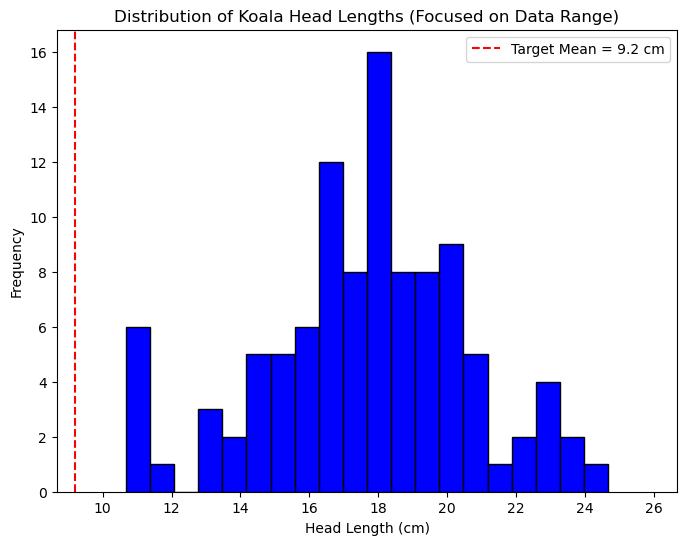

In [63]:
# Visualization: Improved Histogram of Koala head lengths
plt.figure(figsize=(8, 6))

# Plot the histogram with the actual data range
plt.hist(koalas_dataset_cleaned['head_length'], bins=20, color='blue', edgecolor='black')

# Adjusting the x-axis to focus on the relevant range
plt.xlim([koalas_dataset_cleaned['head_length'].min() - 2, koalas_dataset_cleaned['head_length'].max() + 2])

# Adding a dashed line for the target mean of 9.2 cm, but focusing only on the relevant range
plt.axvline(x=9.2, color='red', linestyle='--', label="Target Mean = 9.2 cm")

# Adding title and labels
plt.title("Distribution of Koala Head Lengths (Focused on Data Range)")
plt.xlabel("Head Length (cm)")
plt.ylabel("Frequency")

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

### Question 3.2: Do male and female koalas have significantly different mean head lengths?

Explanation:
This question asks us to perform an independent t-test to compare the mean head length between male and female koalas. The independent t-test checks whether the means of two independent groups (male and female) are significantly different.

In [51]:
# Separate the data into male and female groups based on gender
male_koalas = koalas_dataset_cleaned[koalas_dataset_cleaned['gender'] == 'Male']['head_length']
female_koalas = koalas_dataset_cleaned[koalas_dataset_cleaned['gender'] == 'Female']['head_length']

# Perform a two-sample t-test
from scipy import stats

t_statistic, p_value = stats.ttest_ind(male_koalas, female_koalas, equal_var=False)

t_statistic, p_value


# Display the t-statistic and p-value for the gender comparison
print(f"t_statistic: {t_statistic}")
print(f"p_value: {p_value}")

print("\nExplanation of Results: The t-statistic indicates the difference between the two group means (male and female head lengths) in terms of standard error. The p-value shows the probability that the difference between the means occurred by chance. A p-value less than 0.05 suggests a significant difference between male and female koalas in terms of head length.")
# Checking if the result is significant
if p_value < 0.05:
    print("Reject the null hypothesis. Male and female koalas have significantly different mean head lengths.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in mean head lengths between male and female koalas.")

t_statistic: 1.2436544324734866
p_value: 0.21649366313262539

Explanation of Results: The t-statistic indicates the difference between the two group means (male and female head lengths) in terms of standard error. The p-value shows the probability that the difference between the means occurred by chance. A p-value less than 0.05 suggests a significant difference between male and female koalas in terms of head length.

Fail to reject the null hypothesis. There is no significant difference in mean head lengths between male and female koalas.


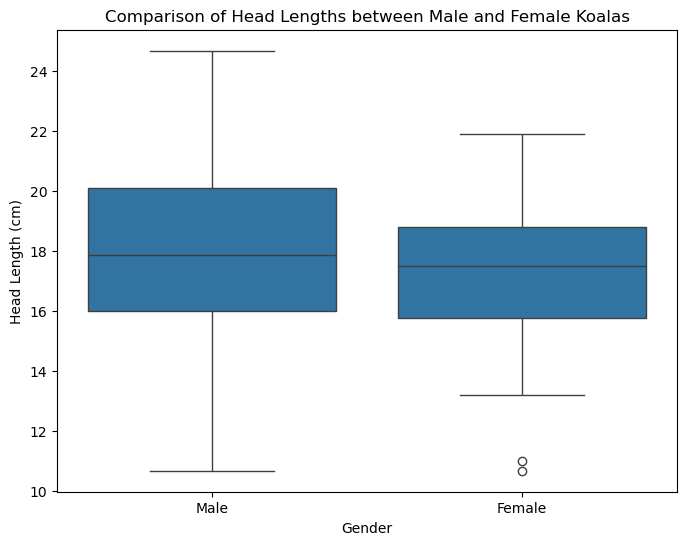

In [52]:
import seaborn as sns
# Visualization: Boxplot of Koala head lengths by gender (Updated)
plt.figure(figsize=(8, 6))

# Using the default color scheme without specifying the palette
sns.boxplot(x='gender', y='head_length', data=koalas_dataset_cleaned)

# Adding labels and title
plt.title("Comparison of Head Lengths between Male and Female Koalas")
plt.xlabel("Gender")
plt.ylabel("Head Length (cm)")

# Display the plot
plt.show()


### Question 3.3: Can we predict the total length of a koala based on its head length?
Explanation:
In this question, we are tasked with performing simple linear regression to predict total length based on head length. Linear regression models the relationship between two variables and allows us to predict the value of one variable based on the value of the other.

In [53]:
# Step 1: Prepare the data for simple linear regression
X = koalas_dataset_cleaned[['head_length']].values  # Independent variable (head length)
y = koalas_dataset_cleaned['total_length'].values   # Dependent variable (total length)

# Step 2: Perform simple linear regression
model = LinearRegression()
model.fit(X, y)

# Output the coefficient and intercept of the linear model
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Step 3: Predict the total length for given head lengths
y_pred = model.predict(X)

Coefficient (slope): 0.8970563204488111
Intercept: 59.310620948413785


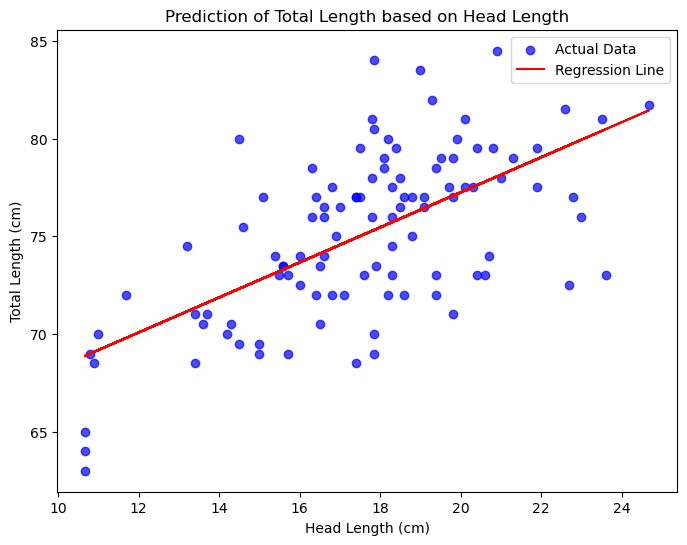

In [54]:
# Step 4: Visualization: Scatter plot of head length vs. total length with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['head_length'], df['total_length'], color='blue', alpha=0.7, label="Actual Data")
plt.plot(df['head_length'], y_pred, color='red', label='Regression Line')
plt.title("Prediction of Total Length based on Head Length")
plt.xlabel("Head Length (cm)")
plt.ylabel("Total Length (cm)")
plt.legend()
plt.show()

In [55]:
# Calculate the R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")


R-squared: 0.39382599193441015


### Question 3.4 : Can we predict the total length of a Koala based on multiple factors such as head length, skull width, and foot length?

In [56]:
# Step 1: Prepare the data for multiple linear regression
X_multi = koalas_dataset_cleaned[['head_length', 'skull_width', 'foot_length']].values  # Multiple independent variables
y = koalas_dataset_cleaned['total_length'].values  # Dependent variable (total length)

# Step 2: Perform multiple linear regression
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

# Output the coefficients and intercept of the linear model
print(f"Coefficients (head_length, skull_width, foot_length): {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_}")

# Step 3: Predict the total length based on multiple predictors
y_pred_multi = model_multi.predict(X_multi)

# Step 4: Calculate the R-squared value for multiple regression
r_squared_multi = model_multi.score(X_multi, y)
print(f"R-squared (Multiple Regression): {r_squared_multi}")

Coefficients (head_length, skull_width, foot_length): [0.49743485 0.63061909 0.22554552]
Intercept: 55.0206791011855
R-squared (Multiple Regression): 0.5062421969292787


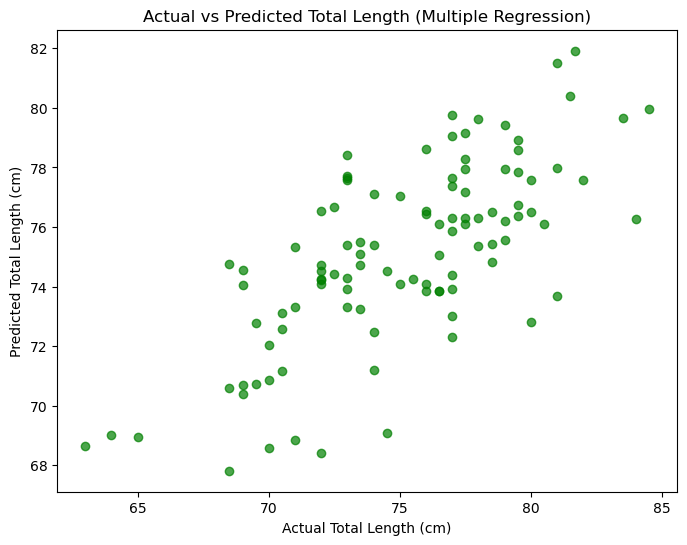

In [57]:
# Step 5: Visualization - Scatter plot of actual vs predicted total length for multiple regression
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_multi, alpha=0.7, color="green")
plt.title("Actual vs Predicted Total Length (Multiple Regression)")
plt.xlabel("Actual Total Length (cm)")
plt.ylabel("Predicted Total Length (cm)")
plt.show()

### Question 3.5 : Do environmental factors such as state affect Koala’s physical characteristics?


                     ear_size  eye_diameter  chest_circumference  \
ear_size             1.000000     -0.171534             0.226149   
eye_diameter        -0.171534      1.000000             0.127255   
chest_circumference  0.226149      0.127255             1.000000   
belly_circumference  0.096671      0.203504             0.538039   
habitat_encoded      0.880670     -0.124367             0.222606   
head_length          0.158900      0.349171             0.524701   
total_length         0.153644      0.206613             0.545029   
Paw Size            -0.388709      0.005591             0.135073   
skull_width          0.053383      0.380141             0.516668   
foot_length          0.775407     -0.002435             0.437235   

                     belly_circumference  habitat_encoded  head_length  \
ear_size                        0.096671         0.880670     0.158900   
eye_diameter                    0.203504        -0.124367     0.349171   
chest_circumference          

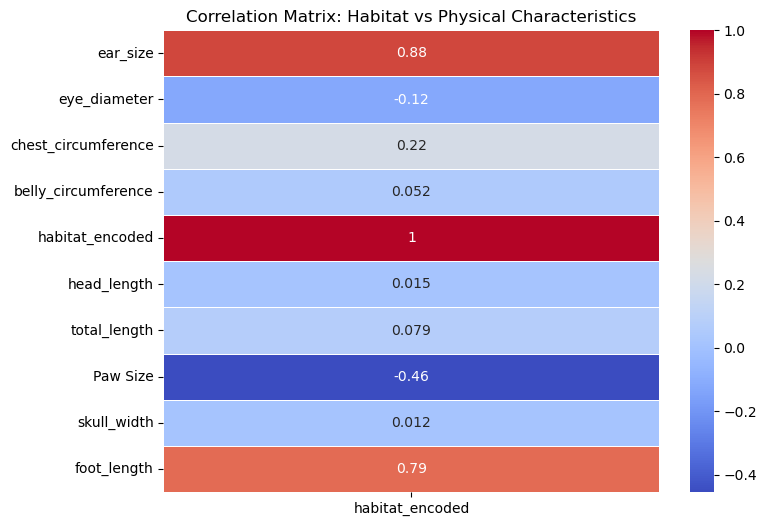

In [76]:
# Compute the correlation matrix only for habitat and physical features
correlation_matrix_habitat = koalas_dataset_cleaned[['ear_size','eye_diameter','chest_circumference','belly_circumference','habitat_encoded', 'head_length', 'total_length', 
                                                     'Paw Size', 'skull_width', 'foot_length']].corr()

# Display the correlation matrix
print(correlation_matrix_habitat)

# Visualization - Correlation heatmap (Habitat vs Physical Characteristics)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_habitat[['habitat_encoded']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Habitat vs Physical Characteristics')
plt.show()

### Question 3.6: What factors are correlated with the total length of a Koala?

In [77]:
# Step 1: Compute the correlation matrix focusing on total_length and other characteristics
correlation_with_total_length = koalas_dataset_cleaned[['total_length', 'Paw Size',  'head_length', 
                                                        'ear_size', 'foot_length', 'skull_width', 
                                                        'eye_diameter', 'chest_circumference', 
                                                        'belly_circumference']].corr()

# Step 2: Extract the correlations with total_length
corr_with_total_length = correlation_with_total_length['total_length'].sort_values(ascending=False)

# Step 3: Display the correlations with total_length
print("Correlation with Total Length:")
print(corr_with_total_length)

Correlation with Total Length:
total_length           1.000000
head_length            0.627556
skull_width            0.602099
chest_circumference    0.545029
Paw Size               0.481378
foot_length            0.443706
belly_circumference    0.396948
eye_diameter           0.206613
ear_size               0.153644
Name: total_length, dtype: float64


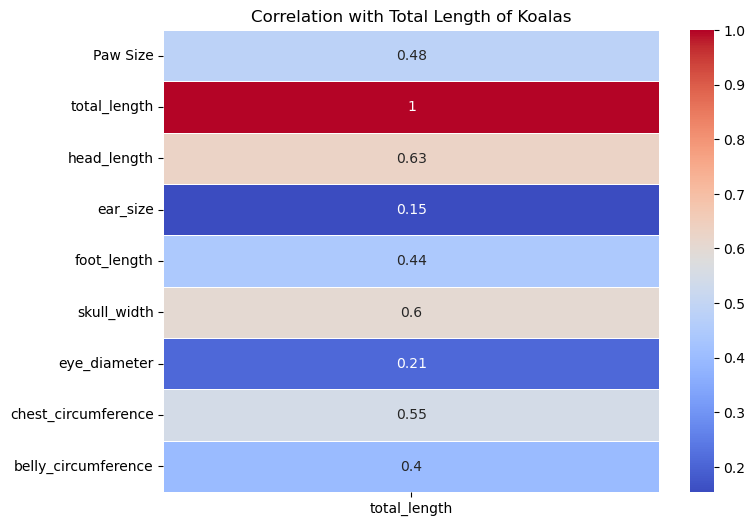

In [61]:
# Step 4: Visualization - Correlation heatmap focused on total_length
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_total_length[['total_length']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation with Total Length of Koalas")
plt.show()

## Section 4: Recommendations

Based on the correlation analysis and the relationships between koala physical characteristics and environmental factors, we can derive several actionable insights that can be integrated into koala conservation strategies:

Habitat Preservation and Management:

The analysis showed that habitat (represented by the encoded habitat variable) has a significant correlation with key physical characteristics such as ear size (correlation = 0.88) and foot length (correlation = 0.79). These strong correlations suggest that environmental factors directly influence the growth and development of koalas, particularly in traits that might affect mobility and sensory capabilities.
Conservation Strategy: Protecting and managing koala habitats is crucial to ensure that koalas have access to environments conducive to their optimal physical development. Conservation programs should focus on maintaining habitats that support healthy growth, especially in areas where koalas exhibit favorable physical traits. Habitat degradation, whether due to urbanization, deforestation, or climate change, may impair the physical development of koalas, potentially affecting their survival and ability to thrive.

Health Monitoring through Key Physical Characteristics:

The analysis revealed strong correlations between head length, skull width, and total length, indicating that these physical characteristics are closely related and can serve as indicators of overall health and growth. Specifically, total length is highly correlated with head length (correlation = 0.63) and skull width (correlation = 0.60). This suggests that variations in these physical traits can reflect the health and well-being of koalas.
Conservation Strategy: Regular health monitoring of koalas should include measurements of these key physical characteristics. For example, if a koala’s head length or skull width is below the expected range, it could signal malnutrition or other health issues. Monitoring these traits can help conservationists intervene early if a koala is showing signs of poor growth or developmental abnormalities. This data can be collected through non-invasive methods, and tracking changes over time can inform conservationists about the effectiveness of current conservation efforts or habitat conditions.

Conclusion
The analysis of koala physical characteristics has provided important insights into how environmental factors influence their development. Conservation efforts should focus on habitat protection and regular monitoring of key physical traits, such as head length and skull width, to ensure the health and well-being of koalas in the wild.
